In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
#importing data
df = pd.read_csv('social_net_ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:>

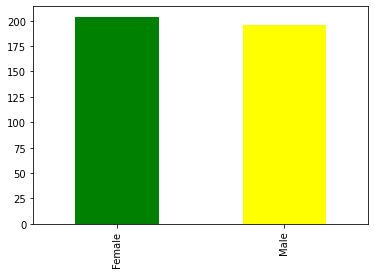

In [5]:
#data exploration
df.Gender.value_counts().plot(kind='bar',color=['green','yellow'])

<AxesSubplot:>

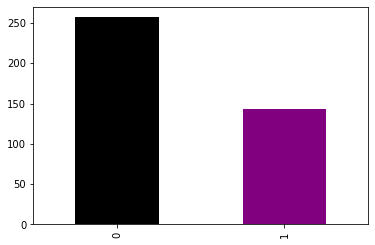

In [6]:
df.Purchased.value_counts().plot(kind='bar',color=['black','purple'])

In [7]:
#labeling gender
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['gender'] = en.fit_transform(df.Gender)

In [9]:
#seperating data into input and target
x = df[['Age','EstimatedSalary','gender']]
y=df.Purchased
x.head()

,Age,EstimatedSalary,gender
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [16]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [17]:
#feature scaling
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [24]:
#fitting logistic model
model = LogisticRegression(random_state=10)
model.fit(X_train,y_train)

LogisticRegression(random_state=10)

In [26]:
model.score(X_test,y_test)

0.8333333333333334

In [27]:
#predicted values 
y_predicted = model.predict(X_test)

In [29]:
#visualizing the predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[73,  4],
       [16, 27]], dtype=int64)

<AxesSubplot:>

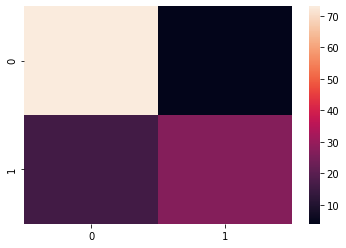

In [30]:
sn.heatmap(cm)